# Setup

In [33]:
!wget -O pulution.npy 'https://drive.google.com/uc?export=download&id=1YNM-N3HrER8NKVE16C3EavlSTGAlacjJ'

--2020-06-09 14:03:59--  https://drive.google.com/uc?export=download&id=1YNM-N3HrER8NKVE16C3EavlSTGAlacjJ
Resolving drive.google.com (drive.google.com)... 172.217.212.113, 172.217.212.102, 172.217.212.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.212.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8v086vbe1imre740ujst16kgb4ugat4e/1591711425000/01019297866349987175/*/1YNM-N3HrER8NKVE16C3EavlSTGAlacjJ?e=download [following]
--2020-06-09 14:04:01--  https://doc-00-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8v086vbe1imre740ujst16kgb4ugat4e/1591711425000/01019297866349987175/*/1YNM-N3HrER8NKVE16C3EavlSTGAlacjJ?e=download
Resolving doc-00-5k-docs.googleusercontent.com (doc-00-5k-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to doc-00-5k-docs.googleusercontent.com (d

In [0]:
# !pip3 install tf-nightly # some packages were not available in std version of tensorflow

In [0]:
# this cell contains the original source code cloned from tf repository
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.python.data.ops import dataset_ops
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.util.tf_export import keras_export


def timeseries_dataset_from_array(
    data,
    targets,
    sequence_length,
    sequence_stride=1,
    sampling_rate=1,
    batch_size=1,
    shuffle=False,
    seed=None,
    start_index=None,
    end_index=None):
  """Creates a dataset of sliding windows over a timeseries provided as array.
  This function takes in a sequence of data-points gathered at
  equal intervals, along with time series parameters such as
  length of the sequences/windows, spacing between two sequence/windows, etc.,
  to produce batches of timeseries inputs and targets.
  Arguments:
    data: Numpy array or eager tensor
      containing consecutive data points (timesteps).
      Axis 0 is expected to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
      It should have same length as `data`. `targets[i]` should be the target
      corresponding to the window that starts at index `i`
      (see example 2 below).
      Pass None if you don't have target data (in this case the dataset will
      only yield the input data).
    sequence_length: Length of the output sequences (in number of timesteps).
    sequence_stride: Period between successive output sequences.
      For stride `s`, output samples would
      start at index `data[i]`, `data[i + s]`, `data[i + 2 * s]`, etc.
    sampling_rate: Period between successive individual timesteps
      within sequences. For rate `r`, timesteps
      `data[i], data[i + r], ... data[i + sequence_length]`
      are used for create a sample sequence.
    batch_size: Number of timeseries samples in each batch
      (except maybe the last one).
    shuffle: Whether to shuffle output samples,
      or instead draw them in chronological order.
    seed: Optional int; random seed for shuffling.
    start_index: Optional int; data points earlier (exclusive)
      than `start_index` will not be used
      in the output sequences. This is useful to reserve part of the
      data for test or validation.
    end_index: Optional int; data points later (exclusive) than `end_index`
      will not be used in the output sequences.
      This is useful to reserve part of the data for test or validation.
  Returns:
    A tf.data.Dataset instance. If `targets` was passed, the dataset yields
    tuple `(batch_of_sequences, batch_of_targets)`. If not, the dataset yields
    only `batch_of_sequences`.
  Example 1:
    Consider indices `[0, 1, ... 99]`.
    With `sequence_length=10,  sampling_rate=2, sequence_stride=3`,
    `shuffle=False`, the dataset will yield batches of sequences
    composed of the following indices:
  ```
  First sequence:  [0  2  4  6  8 10 12 14 16 18]
  Second sequence: [3  5  7  9 11 13 15 17 19 21]
  Third sequence:  [6  8 10 12 14 16 18 20 22 24]
  ...
  Last sequence:   [78 80 82 84 86 88 90 92 94 96]
  ```
  In this case the last 3 data points are discarded since no full sequence
  can be generated to include them (the next sequence would have started
  at index 81, and thus its last step would have gone over 99).
  Example 2: temporal regression. Consider an array `data` of scalar
  values, of shape `(steps,)`. To generate a dataset that uses the past 10
  timesteps to predict the next timestep, you would use:
  ```python
  input_data = data[:-10]
  targets = data[10:]
  dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
      input_data, targets, sequence_length=10)
  for batch in dataset:
    inputs, targets = batch
    assert np.array_equal(inputs[0], data[:10])  # First sequence: steps [0-9]
    assert np.array_equal(targets[0], data[10])  # Corresponding target: step 10
    break
  ```
  """
  # Validate the shape of data and targets
  if targets is not None and len(targets) != len(data):
    raise ValueError('Expected data and targets to have the same number of '
                     'time steps (axis 0) but got '
                     'shape(data) = %s; shape(targets) = %s.' %
                     (data_f, ds_tarain_t  .shape, targets.shape))
  if start_index and (start_index < 0 or start_index >= len(data)):
    raise ValueError('start_index must be higher than 0 and lower than the '
                     'length of the data. Got: start_index=%s '
                     'for data of length %s.' % (start_index, len(data)))
  if end_index:
    if start_index and end_index <= start_index:
      raise ValueError('end_index must be higher than start_index. Got: '
                       'start_index=%s, end_index=%s.' %
                       (start_index, end_index))
    if end_index >= len(data):
      raise ValueError('end_index must be lower than the length of the data. '
                       'Got: end_index=%s' % (end_index,))
    if end_index <= 0:
      raise ValueError('end_index must be higher than 0. '
                       'Got: end_index=%s' % (end_index,))

  # Validate strides
  if sampling_rate <= 0 or sampling_rate >= len(data):
    raise ValueError(
        'sampling_rate must be higher than 0 and lower than '
        'the length of the data. Got: '
        'sampling_rate=%s for data of length %s.' % (sampling_rate, len(data)))
  if sequence_stride <= 0 or sequence_stride >= len(data):
    raise ValueError(
        'sequence_stride must be higher than 0 and lower than '
        'the length of the data. Got: sequence_stride=%s '
        'for data of length %s.' % (sequence_stride, len(data)))

  if start_index is None:
    start_index = 0
  if end_index is None:
    end_index = len(data)

  # Determine the lowest dtype to store start positions (to lower memory usage).
  num_seqs = end_index - start_index - (sequence_length * sampling_rate) + 1
  if num_seqs < 2147483647:
    index_dtype = 'int32'
  else:
    index_dtype = 'int64'

  # Generate start positions
  start_positions = np.arange(0, num_seqs, sequence_stride, dtype=index_dtype)
  if shuffle:
    if seed is None:
      seed = np.random.randint(1e6)
    rng = np.random.RandomState(seed)
    rng.shuffle(start_positions)

  sequence_length = math_ops.cast(sequence_length, dtype=index_dtype)
  sampling_rate = math_ops.cast(sampling_rate, dtype=index_dtype)

  positions_ds = dataset_ops.Dataset.from_tensors(start_positions).repeat()

  # For each initial window position, generates indices of the window elements
  indices = dataset_ops.Dataset.zip(
      (dataset_ops.Dataset.range(len(start_positions)), positions_ds)).map(
          lambda i, positions: math_ops.range(  # pylint: disable=g-long-lambda
              positions[i],
              positions[i] + sequence_length * sampling_rate,
              sampling_rate),
          num_parallel_calls=dataset_ops.AUTOTUNE)

  dataset = sequences_from_indices(data, indices, start_index, end_index)
  if targets is not None:
    indices = dataset_ops.Dataset.zip(
        (dataset_ops.Dataset.range(len(start_positions)), positions_ds)).map(
            lambda i, positions: positions[i],
            num_parallel_calls=dataset_ops.AUTOTUNE)
    target_ds = sequences_from_indices(
        targets, indices, start_index, end_index)
    # dataset = dataset_ops.Dataset.zip((dataset, target_ds))
  if shuffle:
    # Shuffle locally at each iteration
    dataset = dataset.shuffle(buffer_size=batch_size * 8, seed=seed)
#   dataset = dataset.batch(batch_size)
  return np.array(list(dataset.as_numpy_iterator())) , np.array(list(target_ds.as_numpy_iterator()))


def sequences_from_indices(array, indices_ds, start_index, end_index):
  dataset = dataset_ops.Dataset.from_tensors(array[start_index : end_index])
  dataset = dataset_ops.Dataset.zip((dataset.repeat(), indices_ds)).map(
      lambda steps, inds: array_ops.gather(steps, inds),  # pylint: disable=unnecessary-lambda
      num_parallel_calls=dataset_ops.AUTOTUNE)
  return dataset


In [36]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5083115205707664452
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1579821924820528999
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7564126093338777781
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11150726272
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17932839239228895823
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import random
import cv2
from tqdm import tqdm
import copy

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D , MaxPooling2D
from keras.layers import SimpleRNN, LSTM, GRU
from keras.layers import Embedding
from keras.layers.normalization import BatchNormalization
# new package only available in tf-nightly
# from keras.preprocessing import timeseries_dataset_from_array
from keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import confusion_matrix
from keras import optimizers
from keras.preprocessing.image import  ImageDataGenerator as IDG
from time import time


np.random.seed(1234)

# load data

In [0]:
X = np.load('./pulution.npy')

In [39]:
X.shape

(43799, 8)

# train-test split

In [40]:
X_train = copy.deepcopy(X[:35040, :])
X_test  = copy.deepcopy(X[35040:, :])
X_train.shape, X_test.shape

((35040, 8), (8759, 8))

# make sequences(data preprocessing)

In [0]:
def make_seq(X, wnd_size = 11, smpl=1):
    assert X.shape[0] >=  wnd_size
    input_data = X[:-wnd_size]
    targets = X[wnd_size:, 0]
    # timeseries_dataset_from_array is only available in tf-nightly
    return timeseries_dataset_from_array(input_data, targets, sequence_length=wnd_size, sampling_rate=smpl)

In [0]:
wnd_size = 11
smpl = 1
n_feature = 8
train_f, train_t = make_seq(X_train, wnd_size, smpl)
test_f, test_t  = make_seq(X_test, wnd_size, smpl)

In [43]:
train_f.shape, train_t.shape, test_f.shape, test_t.shape

((35019, 11, 8), (35019,), (8738, 11, 8), (8738,))

# make simple RNN model

In [48]:
model = keras.Sequential()
model.add(SimpleRNN(1, input_shape=(wnd_size, n_feature)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='adam')
# print(t)

In [54]:
t = time()
history = model.fit(train_f, train_t, validation_data=(test_f, test_t), epochs=50, batch_size=512)
t1 = time()
print(t1- t)

Train on 35019 samples, validate on 8738 samples
Epoch 1/50
35019/35019 [==============================] - 1s 40us/step - loss: 0.0028 - val_loss: 0.0022
Epoch 2/50
35019/35019 [==============================] - 1s 34us/step - loss: 0.0019 - val_loss: 0.0015
Epoch 3/50
35019/35019 [==============================] - 1s 35us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/50
35019/35019 [==============================] - 1s 37us/step - loss: 0.0012 - val_loss: 9.5926e-04
Epoch 5/50
35019/35019 [==============================] - 1s 35us/step - loss: 0.0010 - val_loss: 8.5309e-04
Epoch 6/50
35019/35019 [==============================] - 1s 36us/step - loss: 9.6418e-04 - val_loss: 8.0049e-04
Epoch 7/50
35019/35019 [==============================] - 1s 34us/step - loss: 9.2152e-04 - val_loss: 7.5056e-04
Epoch 8/50
35019/35019 [==============================] - 1s 35us/step - loss: 8.9191e-04 - val_loss: 7.2197e-04
Epoch 9/50
35019/35019 [==============================] - 1s 34us/step - loss: 

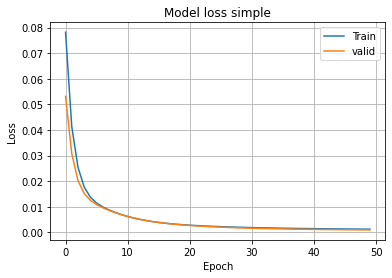

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.grid()
plt.show()

In [0]:
model.trainable = False
model.compile(loss='mse', optimizer='adam')

In [0]:
pred = model(tf.convert_to_tensor(train_f))

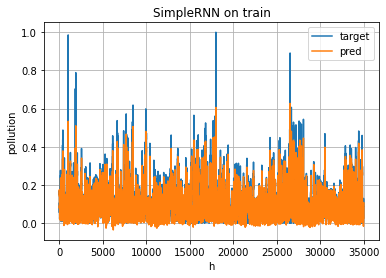

In [22]:
plt.plot(train_t, label='target')
plt.plot(keras.backend.eval(pred), label='pred')
plt.grid()
plt.xlabel('h')
plt.ylabel('pollution')
plt.title('SimpleRNN on train')
plt.legend()

In [0]:
pred = model(tf.convert_to_tensor(test_f))

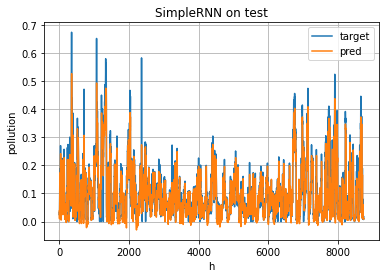

In [24]:
plt.plot(test_t, label='target')
plt.plot(keras.backend.eval(pred), label='pred')
plt.grid()
plt.xlabel('h')
plt.ylabel('pollution')
plt.title('SimpleRNN on test')
plt.legend()

# make LSTM Model

In [56]:
model = keras.Sequential()
model.add(LSTM(1, input_shape=(wnd_size, n_feature)))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 40        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='adam')

In [58]:
t = time()
history = model.fit(train_f, train_t, validation_data=(test_f, test_t), epochs=50, batch_size=512)
t1 = time()
print(t1 - 1)

Train on 35019 samples, validate on 8738 samples
Epoch 1/50
35019/35019 [==============================] - 3s 86us/step - loss: 0.0223 - val_loss: 0.0165
Epoch 2/50
35019/35019 [==============================] - 3s 80us/step - loss: 0.0135 - val_loss: 0.0129
Epoch 3/50
35019/35019 [==============================] - 3s 78us/step - loss: 0.0108 - val_loss: 0.0106
Epoch 4/50
35019/35019 [==============================] - 3s 78us/step - loss: 0.0091 - val_loss: 0.0090
Epoch 5/50
35019/35019 [==============================] - 3s 77us/step - loss: 0.0078 - val_loss: 0.0077
Epoch 6/50
35019/35019 [==============================] - 3s 78us/step - loss: 0.0068 - val_loss: 0.0067
Epoch 7/50
35019/35019 [==============================] - 3s 78us/step - loss: 0.0060 - val_loss: 0.0059
Epoch 8/50
35019/35019 [==============================] - 3s 76us/step - loss: 0.0053 - val_loss: 0.0052
Epoch 9/50
35019/35019 [==============================] - 3s 79us/step - loss: 0.0047 - val_loss: 0.0045
Epoch 

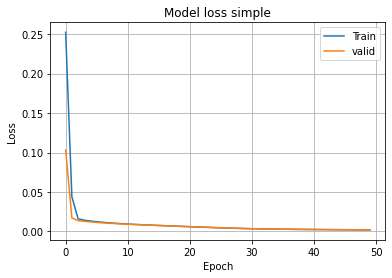

In [41]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.grid()
plt.show()

In [0]:
model.trainable = False
model.compile(loss='mse', optimizer='adam')

In [0]:
pred = model(tf.convert_to_tensor(train_f))

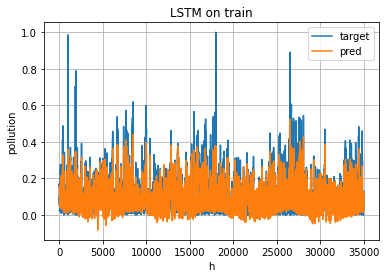

In [44]:
plt.plot(train_t, label='target')
plt.plot(keras.backend.eval(pred), label='pred')
plt.grid()
plt.xlabel('h')
plt.ylabel('pollution')
plt.title('LSTM on train')
plt.legend()

In [0]:
pred = model(tf.convert_to_tensor(test_f))

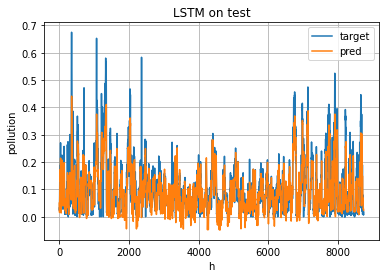

In [46]:
plt.plot(test_t, label='target')
plt.plot(keras.backend.eval(pred), label='pred')
plt.grid()
plt.xlabel('h')
plt.ylabel('pollution')
plt.title('LSTM on test')
plt.legend()

# Make GRU model

In [61]:
model = keras.Sequential()
model.add(GRU(1, input_shape=(wnd_size, n_feature)))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 1)                 30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='adam')

In [63]:
t = time()
history = model.fit(train_f, train_t, validation_data=(test_f, test_t), epochs=50, batch_size=512)
t1 = time()
print(t1 - 1)

Train on 35019 samples, validate on 8738 samples
Epoch 1/50
35019/35019 [==============================] - 4s 121us/step - loss: 0.3259 - val_loss: 0.2364
Epoch 2/50
35019/35019 [==============================] - 4s 103us/step - loss: 0.1591 - val_loss: 0.1117
Epoch 3/50
35019/35019 [==============================] - 4s 101us/step - loss: 0.0815 - val_loss: 0.0650
Epoch 4/50
35019/35019 [==============================] - 4s 101us/step - loss: 0.0558 - val_loss: 0.0500
Epoch 5/50
35019/35019 [==============================] - 3s 98us/step - loss: 0.0460 - val_loss: 0.0425
Epoch 6/50
35019/35019 [==============================] - 4s 101us/step - loss: 0.0395 - val_loss: 0.0366
Epoch 7/50
35019/35019 [==============================] - 3s 98us/step - loss: 0.0337 - val_loss: 0.0311
Epoch 8/50
35019/35019 [==============================] - 3s 100us/step - loss: 0.0284 - val_loss: 0.0263
Epoch 9/50
35019/35019 [==============================] - 4s 102us/step - loss: 0.0240 - val_loss: 0.0223

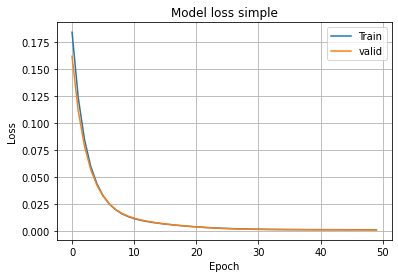

In [56]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.grid()
plt.show()

In [0]:
model.trainable = False
model.compile(loss='mse', optimizer='adam')

In [0]:
pred = model(tf.convert_to_tensor(train_f))

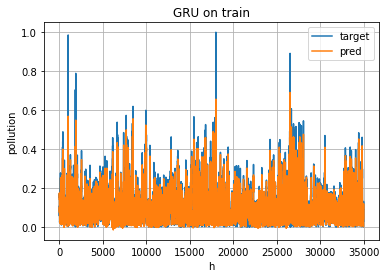

In [53]:
plt.plot(train_t, label='target')
plt.plot(keras.backend.eval(pred), label='pred')
plt.grid()
plt.xlabel('h')
plt.ylabel('pollution')
plt.title('GRU on train')
plt.legend()

In [0]:
pred = model(tf.convert_to_tensor(test_f))

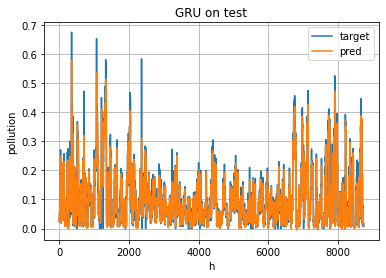

In [55]:
plt.plot(test_t, label='target')
plt.plot(keras.backend.eval(pred), label='pred')
plt.grid()
plt.xlabel('h')
plt.ylabel('pollution')
plt.title('GRU on test')
plt.legend()

# finetune model using different cost function, optimizers and recurrent cells

costs      = [mse , mae]

optimizers = [adam, rmsprop, adagard]

cells      = [SimpleRNN, LSTM, GRU]

In [0]:
cells = [SimpleRNN, LSTM, GRU]
optimizers = ['adam', 'rmsprop', 'adagrad']
costs = ['mse', 'mae']
cells_name = ['SimpleRNN', 'LSTM', 'GRU']

In [0]:
def make_model(cell, optimizer, cost, wnd_size, n_feature, drop_out = 0):
    model = keras.Sequential()
    model.add(cell(1, input_shape=(wnd_size, n_feature),dropout=drop_out, recurrent_dropout=drop_out))
    model.compile(loss=cost, optimizer=optimizer)
    return model

def plot_loss(cell_name, optimizer, cost, history, desc=''):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(desc+f'{cell_name}, {optimizer}, {cost}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'valid'], loc='upper left')
    plt.grid()
    plt.show()

def plot_performance(cell_name, optimizer, cost, model, train_f, train_t, test_f, test_t, desc=''):
    # model.trainable = False
    # model.compile(loss=cost, optimizer=optimizer)

    plt.figure(figsize=(17, 7))
    
    plt.subplot(1, 2, 1)
    # train
    pred = keras.backend.eval(model(tf.convert_to_tensor(train_f)))
    plt.plot(train_t, label='target')
    plt.plot(pred, label='pred')
    plt.grid()
    plt.xlabel('h')
    plt.ylabel('pollution')
    plt.title(desc+f'{cell_name}, {optimizer}, {cost} on train')
    plt.legend()

    print(f'mse on train: {np.sum(np.power(pred- train_t, 2))/len(train_t)}')

    plt.subplot(1, 2, 2)
    # test
    pred = keras.backend.eval(model(tf.convert_to_tensor(test_f)))
    plt.plot(test_t, label='target')
    plt.plot(pred, label='pred')
    plt.grid()
    plt.xlabel('h')
    plt.ylabel('pollution')
    plt.title(f'{cell_name}, {optimizer}, {cost} on test')
    plt.legend()
    print(f'mse on test: {np.sum(np.power(pred- test_t, 2))/len(test_t)}')
    plt.show()

def TimeSeriesGen2np(gen, wnd_size, n_feature):
    f = []
    t = []
    for batch in gen:
        f.append(batch[0])
        t.append(batch[1])
    return np.array(f).reshape(-1, wnd_size, n_feature), np.array(t).reshape(-1, 1)

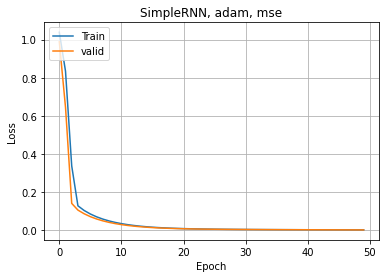

mse on train: 606.8964847654131
mse on test: 155.3268339436942


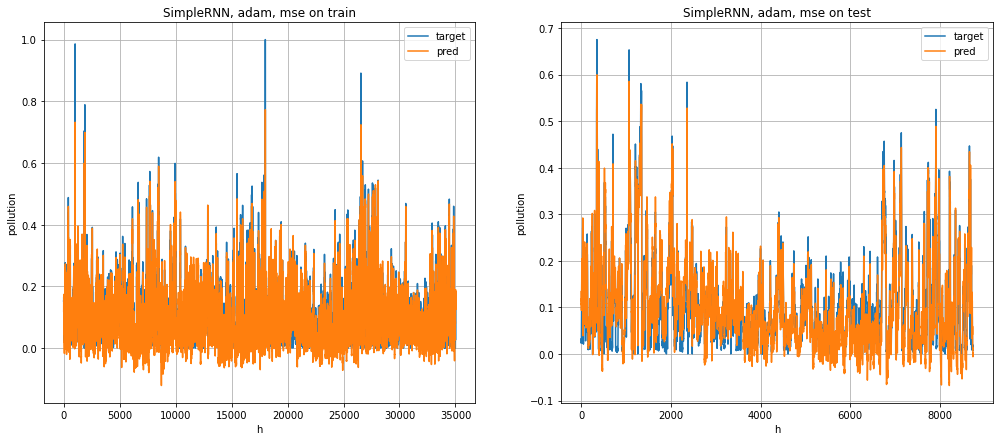

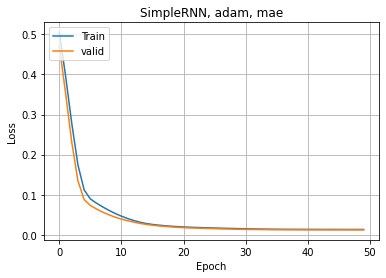

mse on train: 590.4975584682601
mse on test: 152.46882867933166


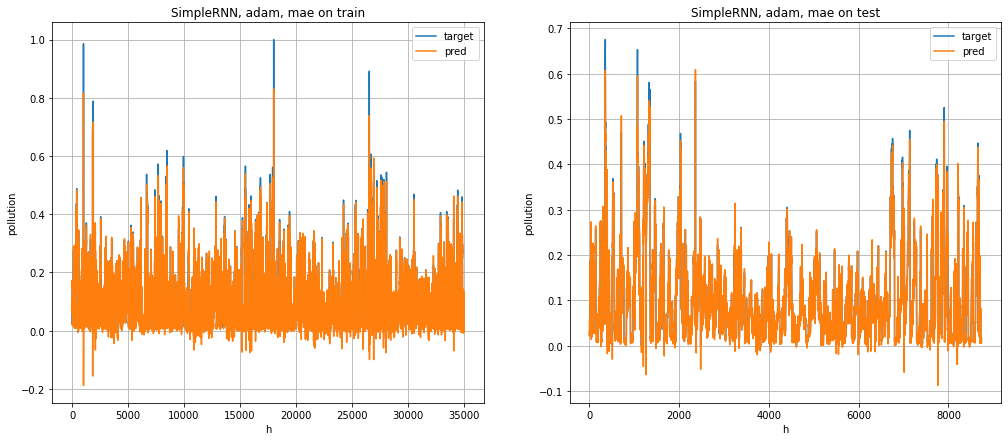

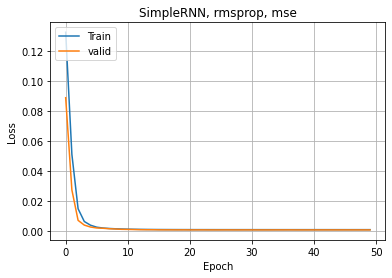

mse on train: 574.619206716354
mse on test: 148.58940833142594


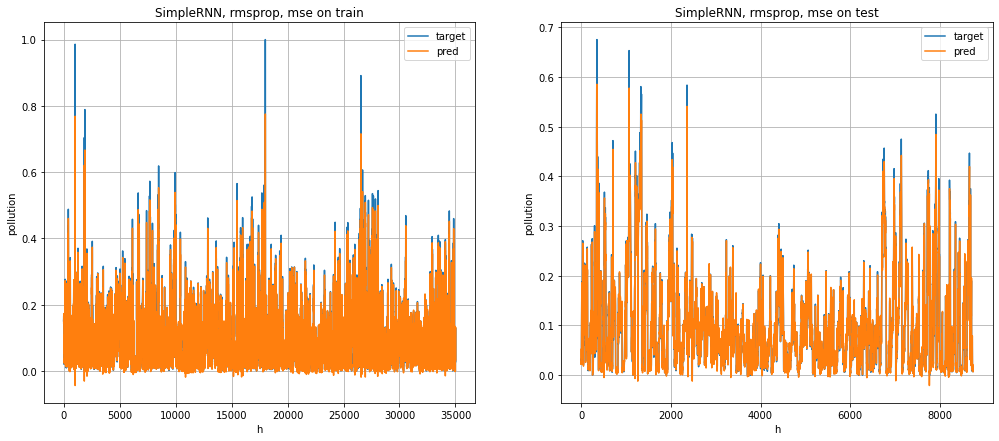

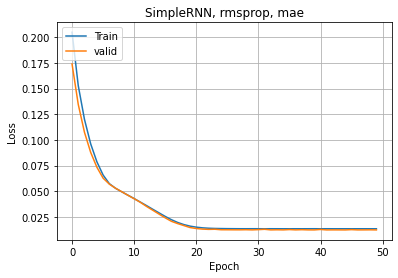

mse on train: 584.5772866158371
mse on test: 151.08656157015335


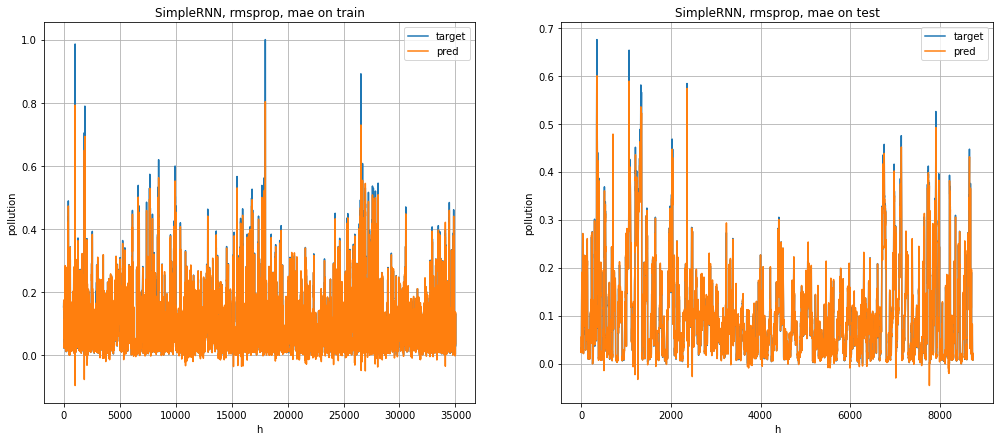

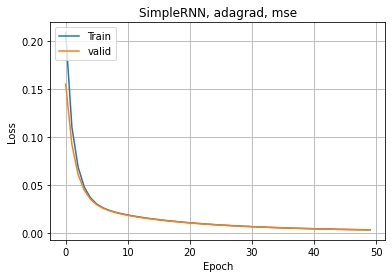

mse on train: 511.6192352722808
mse on test: 132.13997768368048


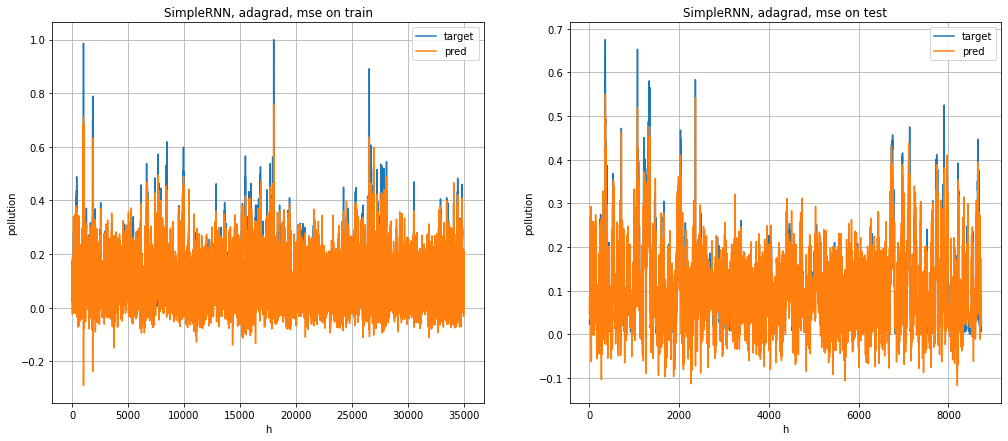

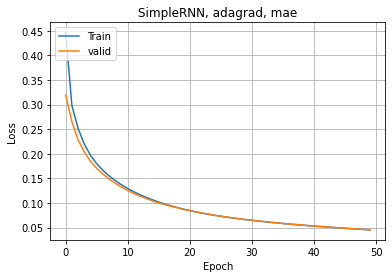

mse on train: 555.4857077586453
mse on test: 144.95363641565575


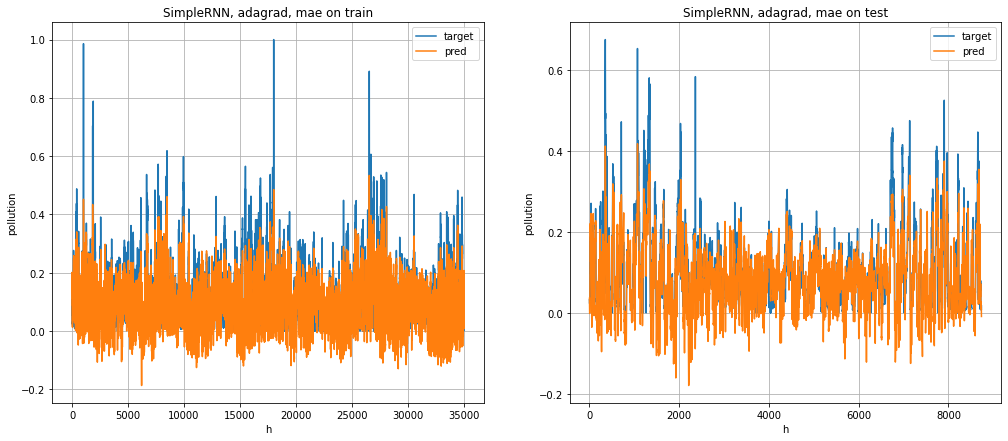

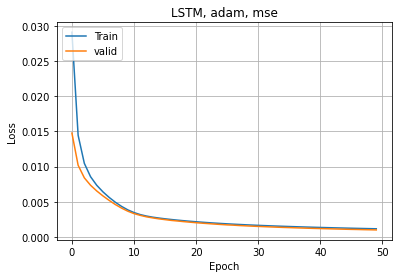

mse on train: 547.1483480396356
mse on test: 140.48761158159763


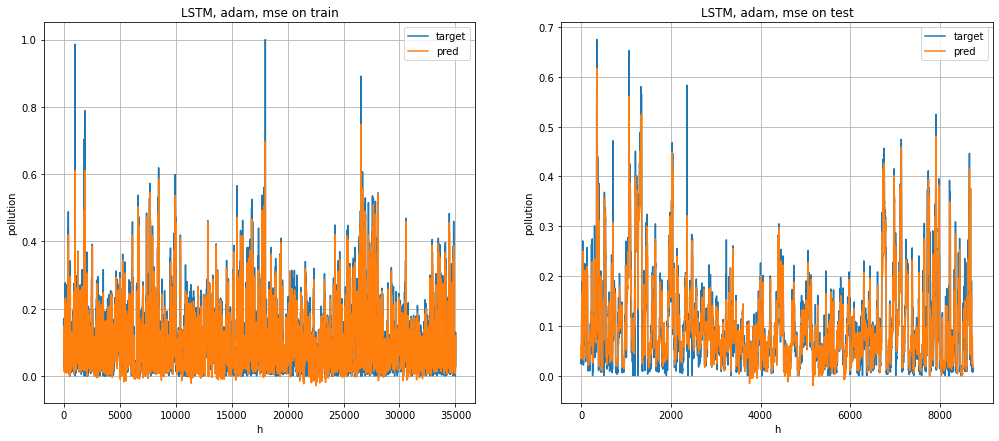

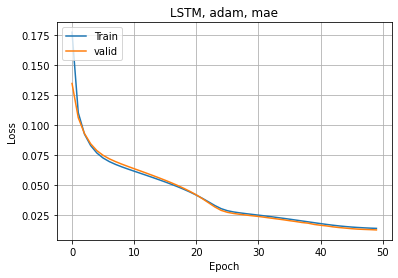

mse on train: 595.3684571232759
mse on test: 154.46980144197758


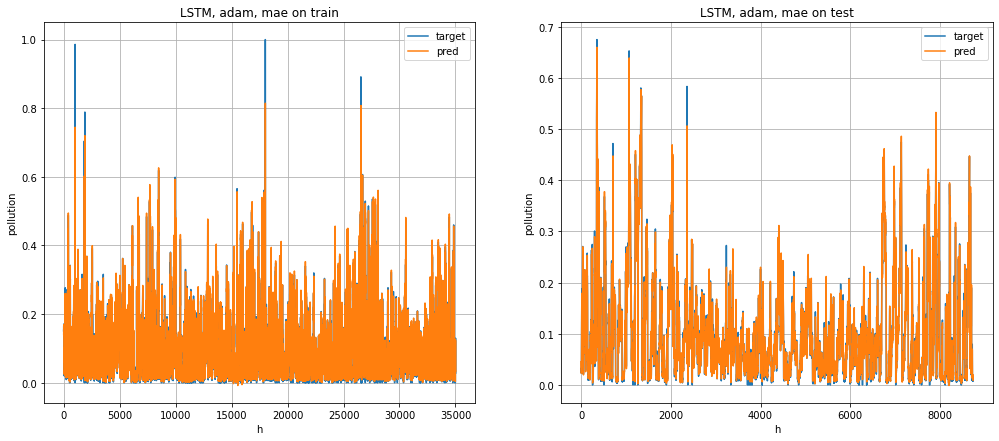

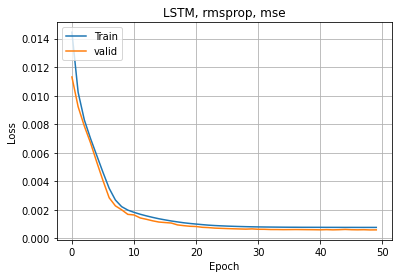

mse on train: 570.6229760986893
mse on test: 147.86964980544747


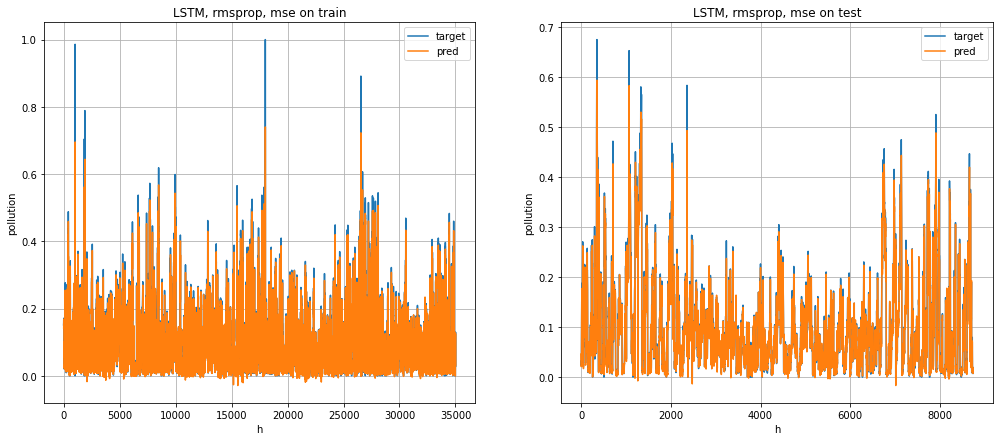

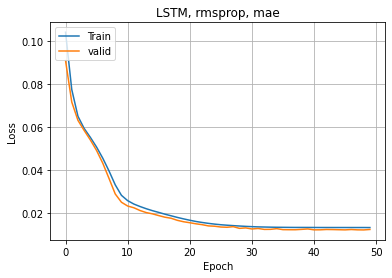

mse on train: 590.7945401067992
mse on test: 152.8655441748684


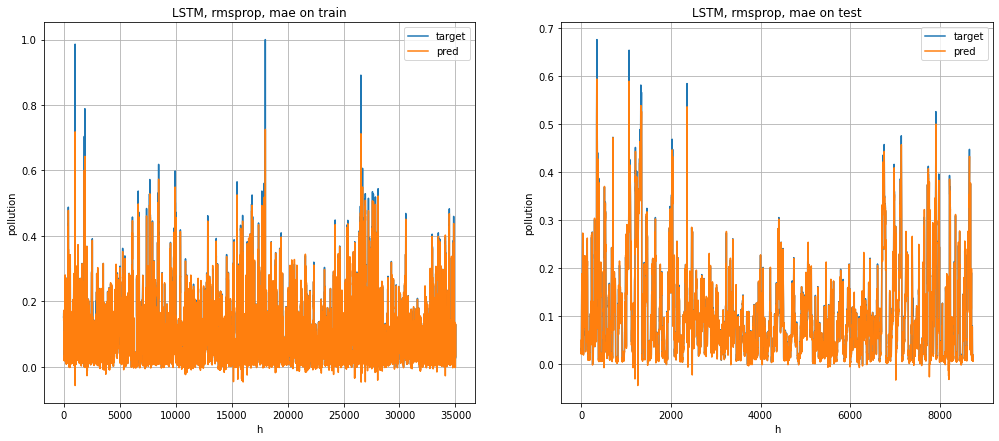

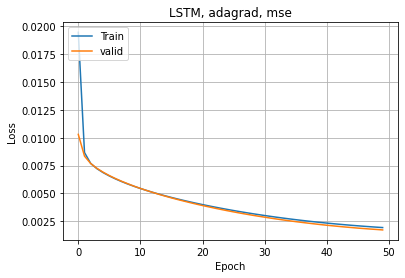

mse on train: 488.69316656672095
mse on test: 128.84152552071413


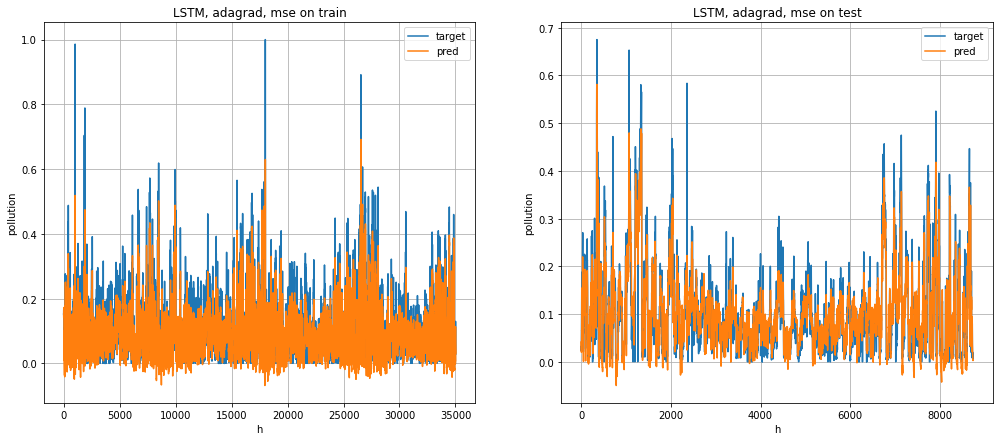

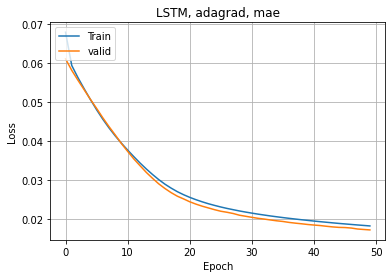

mse on train: 575.243267940261
mse on test: 149.6371452277409


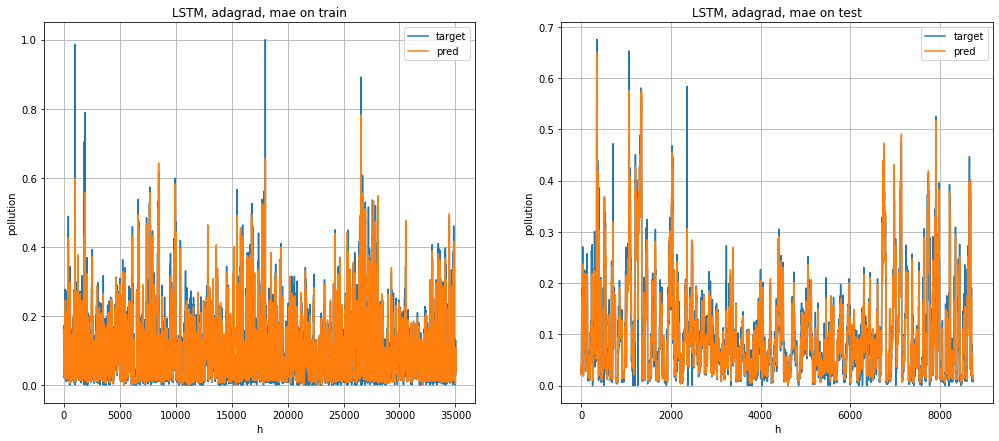

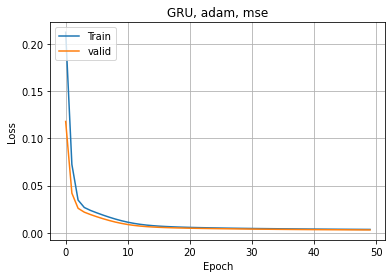

mse on train: 522.3088037922271
mse on test: 129.7831311512932


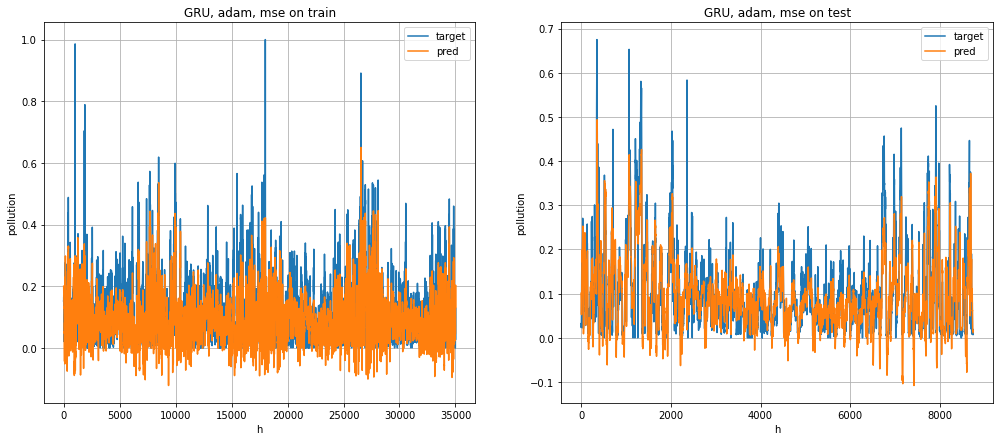

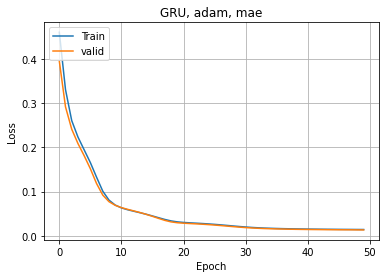

mse on train: 582.5780861817871
mse on test: 150.8055333028153


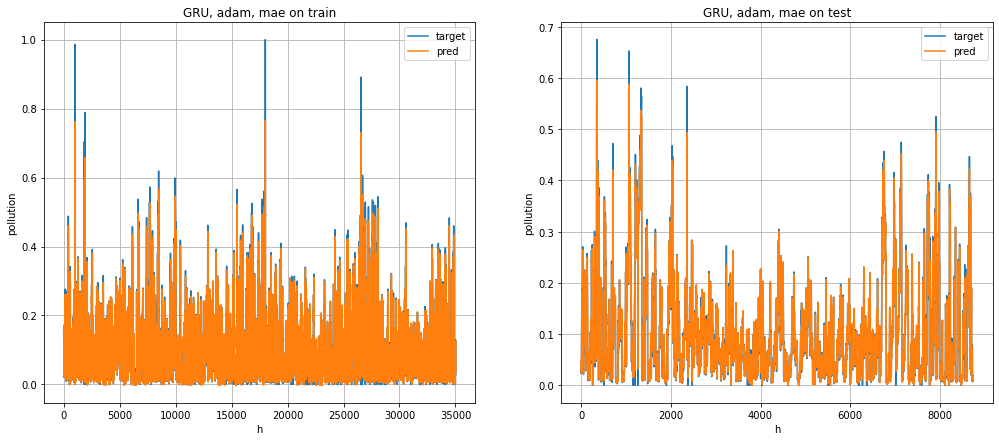

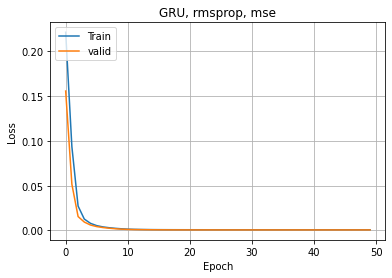

mse on train: 574.300008566778
mse on test: 148.77667944609752


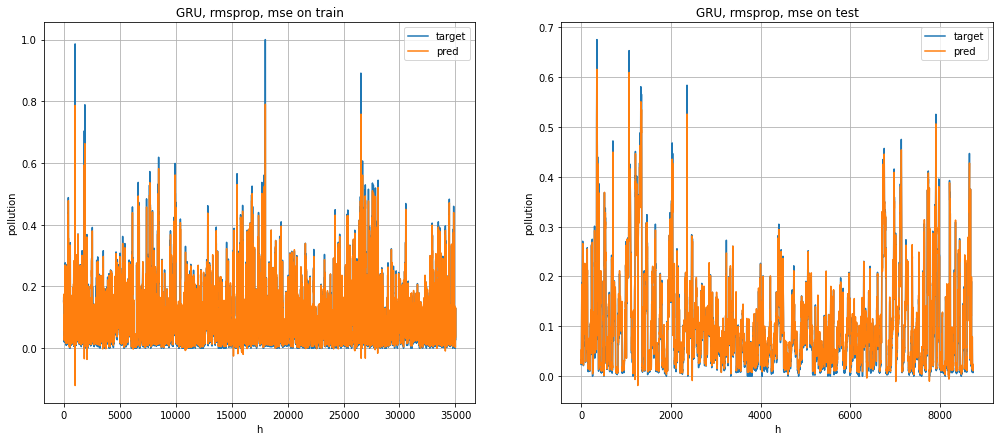

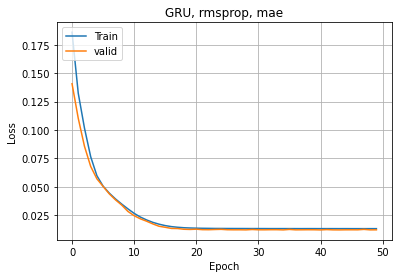

mse on train: 593.275193466404
mse on test: 153.25806820782788


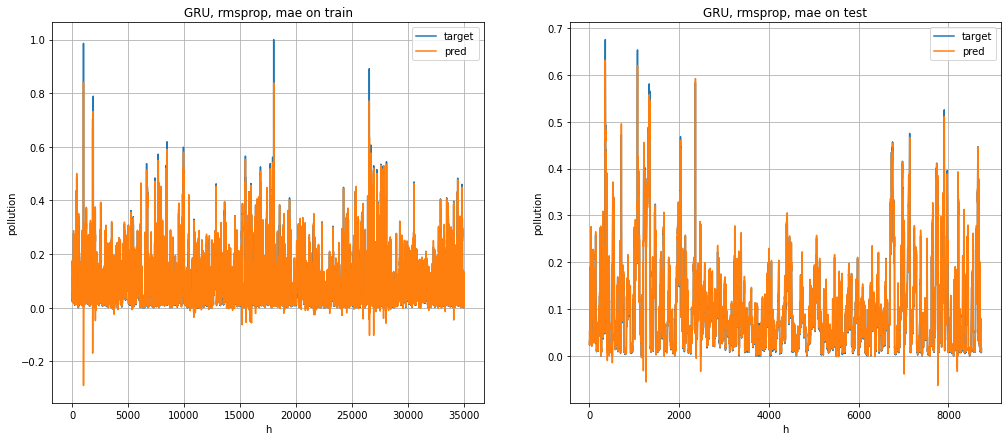

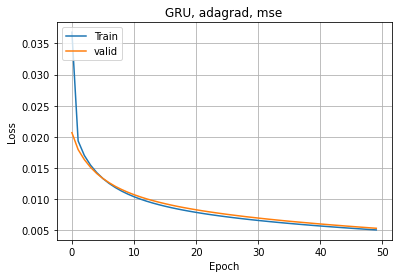

mse on train: 420.1489191581713
mse on test: 107.56446698329137


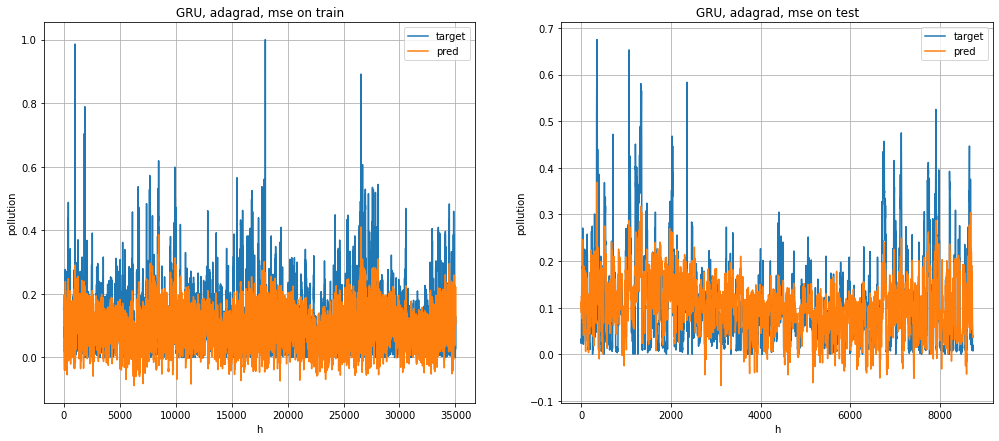

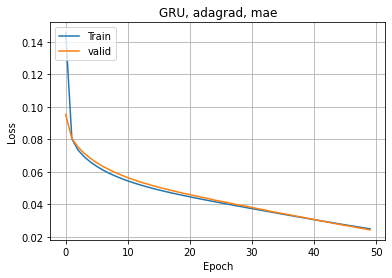

mse on train: 483.99977155258574
mse on test: 125.46550984206912


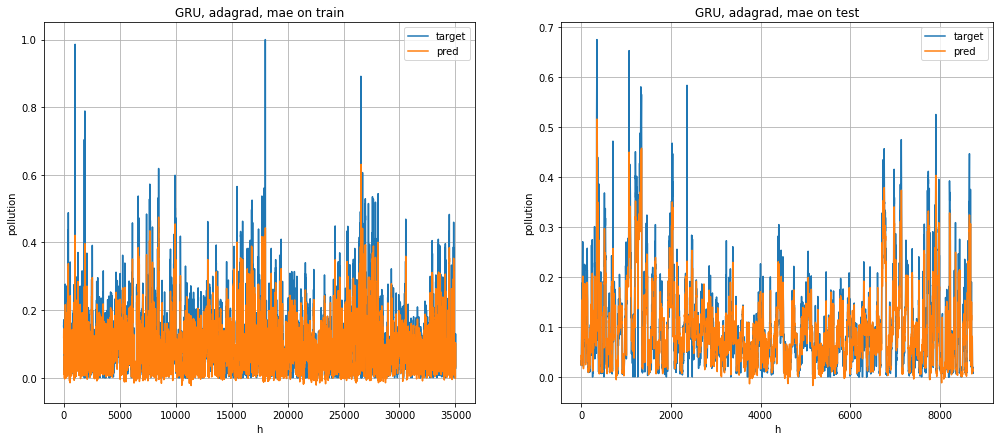

In [66]:
epochs = 50
batch_size = 512
for i, cell in enumerate(cells):
    for optimizer in optimizers:
        for cost in costs:
            model = make_model(cell, optimizer, cost, wnd_size, n_feature)
            history = model.fit(train_f, train_t, validation_data=(test_f, test_t), epochs=epochs, batch_size=batch_size, verbose=0)
            plot_loss(cells_name[i], optimizer, cost, history)
            plot_performance(cells_name[i], optimizer, cost, model, train_f, train_t, test_f, test_t)

# defferent seq types(per day, per week, per month)

In [0]:
week_gen_train = TimeseriesGenerator(X_train, X_train[:,0], length = 3*7*24, sampling_rate=7*24,batch_size=1)
day_gen_train  = TimeseriesGenerator(X_train, X_train[:,0], length = 1*6*24, sampling_rate=24, start_index=3*7*24 - 6*24,batch_size=1)
hour_gen_train = TimeseriesGenerator(X_train, X_train[:,0], length = 23, sampling_rate=1 , start_index=3*7*24 - 23,batch_size=1)
# h5_gen_train   = TimeseriesGenerator(X_train, X_train[:,0], length = 5, sampling_rate=1 , start_index=3*7*24 - 5,batch_size=1)

In [0]:
len(week_gen_train), len(day_gen_train), len(hour_gen_train)#, len(h5_gen_train)

(34536, 34536, 34536, 34536)

In [0]:
week_gen_test = TimeseriesGenerator(X_test, X_test[:,0], length = 3*7*24, sampling_rate=7*24,batch_size=1)
day_gen_test  = TimeseriesGenerator(X_test, X_test[:,0], length = 1*6*24, sampling_rate=24, start_index=3*7*24 - 6*24,batch_size=1)
hour_gen_test = TimeseriesGenerator(X_test, X_test[:,0], length = 23, sampling_rate=1 , start_index=3*7*24 - 23,batch_size=1)
# h5_gen_test  =  TimeseriesGenerator(X_test, X_test[:,0], length = 5, sampling_rate=1 , start_index=3*7*24 - 5,batch_size=1)

In [0]:
len(week_gen_test), len(day_gen_test), len(hour_gen_test)#, len(h5_gen_test)

(8255, 8255, 8255, 8255)

In [0]:
week_train_f, week_train_t = TimeSeriesGen2np(week_gen_train, 3, 8)
week_test_f, week_test_t = TimeSeriesGen2np(week_gen_test, 3, 8)

day_train_f, day_train_t = TimeSeriesGen2np(day_gen_train, 6, 8)
day_test_f, day_test_t = TimeSeriesGen2np(day_gen_test, 6, 8)

hour_train_f, hour_train_t = TimeSeriesGen2np(hour_gen_train, 23, 8)
hour_test_f, hour_test_t = TimeSeriesGen2np(hour_gen_test, 23, 8)

# h5_train_f, h5_train_t = TimeSeriesGen2np(h5_gen_train, 5, 8)
# h5_test_f, h5_test_t = TimeSeriesGen2np(h5_gen_test, 5, 8)

In [0]:
week_model = make_model(GRU, 'adam', 'mse',  3, 8)
day_model  = make_model(GRU, 'adam', 'mse',  6, 8)
hour_model = make_model(GRU, 'adam', 'mse', 23, 8)
# h5_model   = make_model(GRU, 'adam', 'mse',  5, 8)

## train weekly

In [0]:
week_history = week_model.fit(week_train_f, week_train_t, validation_data=(week_test_f, week_test_t), epochs=50, batch_size=256)

Train on 34536 samples, validate on 8255 samples
Epoch 1/50
34536/34536 [==============================] - 1s 37us/step - loss: 0.0108 - val_loss: 0.0107
Epoch 2/50
34536/34536 [==============================] - 1s 36us/step - loss: 0.0104 - val_loss: 0.0104
Epoch 3/50
34536/34536 [==============================] - 1s 36us/step - loss: 0.0101 - val_loss: 0.0102
Epoch 4/50
34536/34536 [==============================] - 1s 36us/step - loss: 0.0099 - val_loss: 0.0099
Epoch 5/50
34536/34536 [==============================] - 1s 36us/step - loss: 0.0097 - val_loss: 0.0097
Epoch 6/50
34536/34536 [==============================] - 1s 35us/step - loss: 0.0095 - val_loss: 0.0095
Epoch 7/50
34536/34536 [==============================] - 1s 36us/step - loss: 0.0094 - val_loss: 0.0094
Epoch 8/50
34536/34536 [==============================] - 1s 36us/step - loss: 0.0092 - val_loss: 0.0093
Epoch 9/50
34536/34536 [==============================] - 1s 37us/step - loss: 0.0091 - val_loss: 0.0091
Epoch 

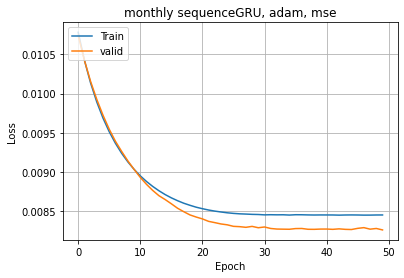

In [0]:
plot_loss('GRU', 'adam', 'mse', week_history, 'monthly sequence')

mse on train: 0.008457251878587741
mse on test: 0.008262618565689354


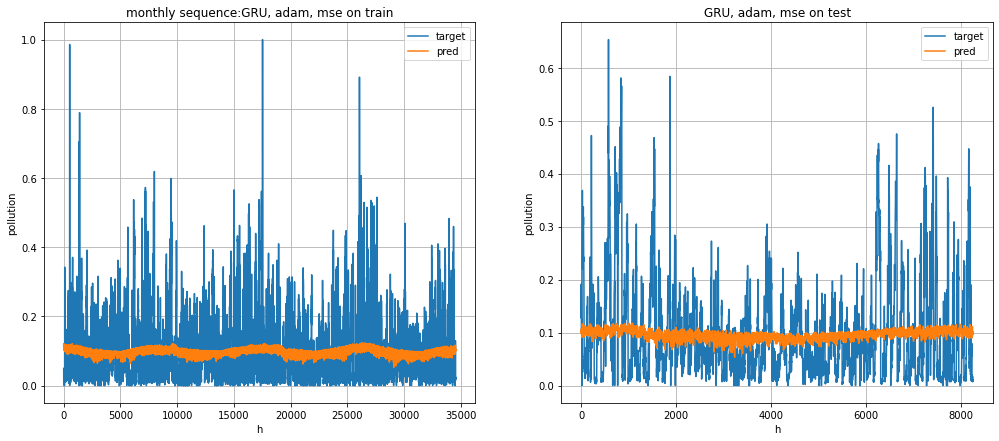

In [0]:
plot_performance('GRU', 'adam', 'mse', week_model, week_train_f, week_train_t, week_test_f, week_test_t, desc='monthly sequence:')

## train daily

In [0]:
daily_history = day_model.fit(day_train_f, day_train_t, validation_data=(day_test_f, day_test_t), epochs=50, batch_size=256)

Train on 34536 samples, validate on 8255 samples
Epoch 1/50
34536/34536 [==============================] - 2s 67us/step - loss: 0.0124 - val_loss: 0.0099
Epoch 2/50
34536/34536 [==============================] - 2s 61us/step - loss: 0.0096 - val_loss: 0.0088
Epoch 3/50
34536/34536 [==============================] - 2s 62us/step - loss: 0.0087 - val_loss: 0.0082
Epoch 4/50
34536/34536 [==============================] - 2s 58us/step - loss: 0.0082 - val_loss: 0.0079
Epoch 5/50
34536/34536 [==============================] - 2s 59us/step - loss: 0.0079 - val_loss: 0.0077
Epoch 6/50
34536/34536 [==============================] - 2s 59us/step - loss: 0.0078 - val_loss: 0.0075
Epoch 7/50
34536/34536 [==============================] - 2s 59us/step - loss: 0.0076 - val_loss: 0.0073
Epoch 8/50
34536/34536 [==============================] - 2s 60us/step - loss: 0.0075 - val_loss: 0.0072
Epoch 9/50
34536/34536 [==============================] - 2s 59us/step - loss: 0.0074 - val_loss: 0.0070
Epoch 

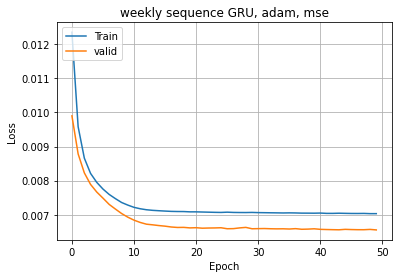

In [0]:
plot_loss('GRU', 'adam', 'mse', daily_history, 'weekly sequence ')

mse on train: 0.0070249351163912295
mse on test: 0.00655390729621134


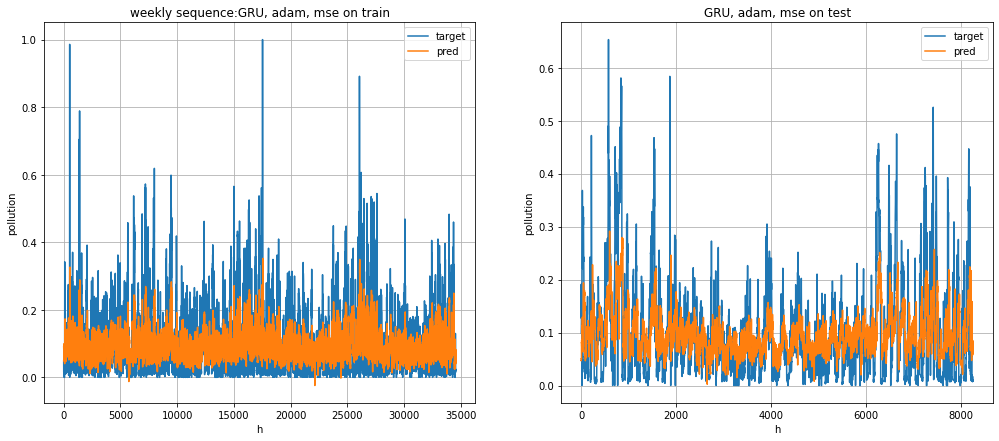

In [0]:
plot_performance('GRU', 'adam', 'mse', day_model, day_train_f, day_train_t, day_test_f, day_test_t, desc='weekly sequence:')

# train hourly model

In [0]:
hour_history = hour_model.fit(hour_train_f, hour_train_t, validation_data=(hour_test_f, hour_test_t), epochs=50, batch_size=256)

Train on 34536 samples, validate on 8255 samples
Epoch 1/50
34536/34536 [==============================] - 7s 198us/step - loss: 0.1188 - val_loss: 0.0524
Epoch 2/50
34536/34536 [==============================] - 7s 192us/step - loss: 0.0361 - val_loss: 0.0314
Epoch 3/50
34536/34536 [==============================] - 7s 193us/step - loss: 0.0262 - val_loss: 0.0240
Epoch 4/50
34536/34536 [==============================] - 6s 188us/step - loss: 0.0200 - val_loss: 0.0182
Epoch 5/50
34536/34536 [==============================] - 7s 191us/step - loss: 0.0153 - val_loss: 0.0139
Epoch 6/50
34536/34536 [==============================] - 7s 192us/step - loss: 0.0119 - val_loss: 0.0109
Epoch 7/50
34536/34536 [==============================] - 7s 190us/step - loss: 0.0095 - val_loss: 0.0088
Epoch 8/50
34536/34536 [==============================] - 6s 187us/step - loss: 0.0079 - val_loss: 0.0073
Epoch 9/50
34536/34536 [==============================] - 6s 187us/step - loss: 0.0067 - val_loss: 0.00

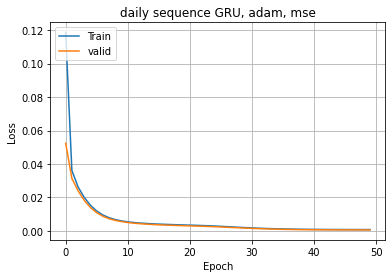

In [0]:
plot_loss('GRU', 'adam', 'mse', hour_history, 'daily sequence ')

mse on train: 0.0007973204394692427
mse on test: 0.0005872312276598759


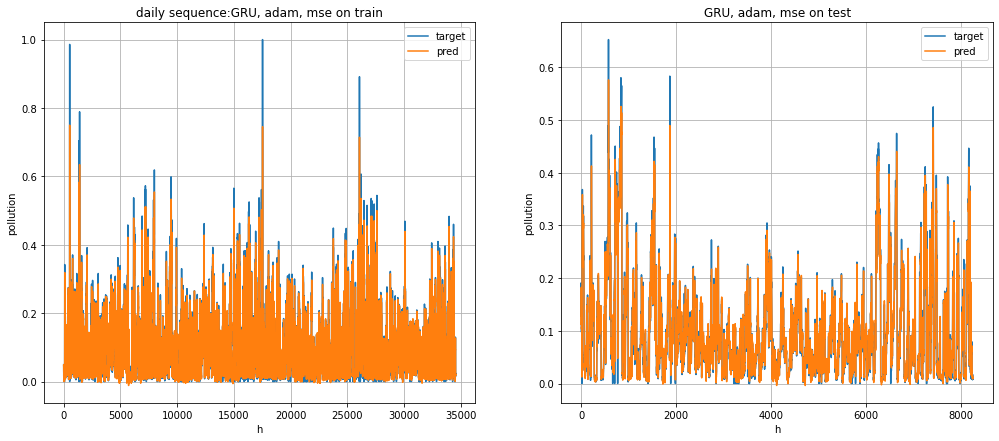

In [0]:
plot_performance('GRU', 'adam', 'mse', hour_model, hour_train_f, hour_train_t, hour_test_f, hour_test_t, desc='daily sequence:')

# Fusion Layer(avg layer)

In [0]:
def avg_performance(models, train_fs, train_t, tests_fs, test_t, cell_name='GRU', optimizer='adam', cost='mse', desc='fusion network'):

    pred_train = []
    pred_test  = []
    # train
    for model, train_f in zip(models, train_fs):
        pred_train += [model(tf.convert_to_tensor(train_f))]

    pred = keras.backend.eval(keras.layers.Average()(pred_train))

    plt.figure(figsize=(17, 7))
    plt.subplot(1, 2, 1)
    plt.plot(train_t, label='target')
    plt.plot(pred, label='pred fusion')
    plt.grid()
    plt.xlabel('h')
    plt.ylabel('pollution')
    plt.title(desc+f'{cell_name}, {optimizer}, {cost} on train')
    plt.legend()

    print(f'mse on train: {np.sum(np.power(pred- train_t, 2))/len(train_t)}')

    # test
    for model, test_f in zip(models, test_fs):
        pred_test += [model(tf.convert_to_tensor(test_f))]
    pred = keras.backend.eval(keras.layers.Average()(pred_test))
    plt.subplot(1, 2, 2)
    plt.plot(test_t, label='target')
    plt.plot(pred, label='pred fusion')
    plt.grid()
    plt.xlabel('h')
    plt.ylabel('pollution')
    plt.title(f'{cell_name}, {optimizer}, {cost} on test')
    plt.legend()
    print(f'mse on test: {np.sum(np.power(pred- test_t, 2))/len(test_t)}')
    plt.show()

In [0]:
models = [week_model, day_model, hour_model]
train_fs = [week_train_f, day_train_f, hour_train_f]
test_fs = [week_test_f, day_test_f, hour_test_f]

mse on train: Tensor("RealDiv_1:0", shape=(34536, 1), dtype=float32)
mse on test: 0.0034846857487974853


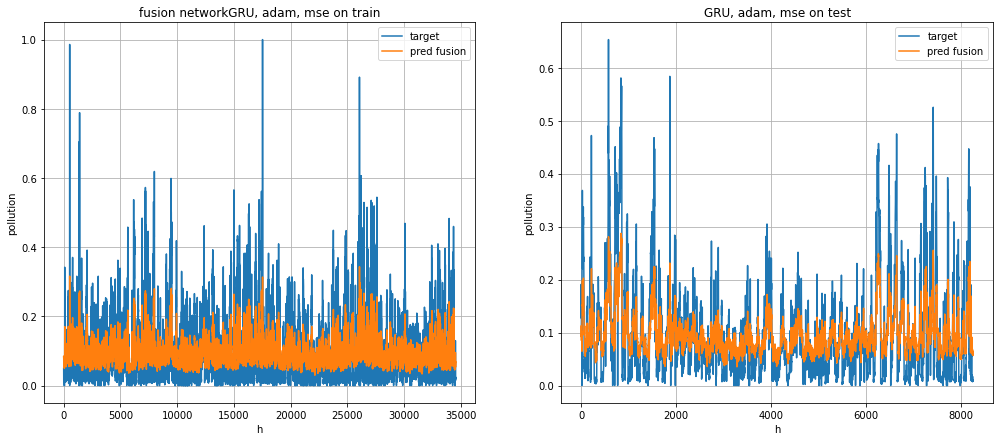

In [0]:
avg_performance(models, train_fs, day_train_t, test_fs, day_test_t)

# drop out effect

In [0]:
drop_model = make_model(GRU, 'adam', 'mse', 23, 8, drop_out=0.3)

In [0]:
drop_history = drop_model.fit(hour_train_f, hour_train_t, validation_data=(hour_test_f, hour_test_t), epochs=50, batch_size=128)

Train on 34536 samples, validate on 8255 samples
Epoch 1/50
34536/34536 [==============================] - 15s 441us/step - loss: 17.6446 - val_loss: 0.0365
Epoch 2/50
34536/34536 [==============================] - 15s 424us/step - loss: 0.5174 - val_loss: 0.0319
Epoch 3/50
34536/34536 [==============================] - 15s 435us/step - loss: 0.2165 - val_loss: 0.0292
Epoch 4/50
34536/34536 [==============================] - 15s 429us/step - loss: 0.1485 - val_loss: 0.0270
Epoch 5/50
34536/34536 [==============================] - 15s 432us/step - loss: 0.0958 - val_loss: 0.0255
Epoch 6/50
34536/34536 [==============================] - 15s 433us/step - loss: 0.0884 - val_loss: 0.0241
Epoch 7/50
34536/34536 [==============================] - 15s 429us/step - loss: 0.2079 - val_loss: 0.0218
Epoch 8/50
34536/34536 [==============================] - 15s 425us/step - loss: 0.0841 - val_loss: 0.0209
Epoch 9/50
34536/34536 [==============================] - 15s 427us/step - loss: 0.0638 - val_

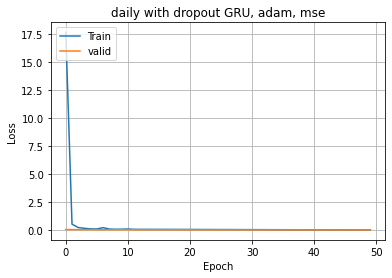

In [0]:
plot_loss('GRU', 'adam', 'mse', drop_history, 'daily with dropout ')

mse on train: 0.005402337242835149
mse on test: 0.005392581285815178


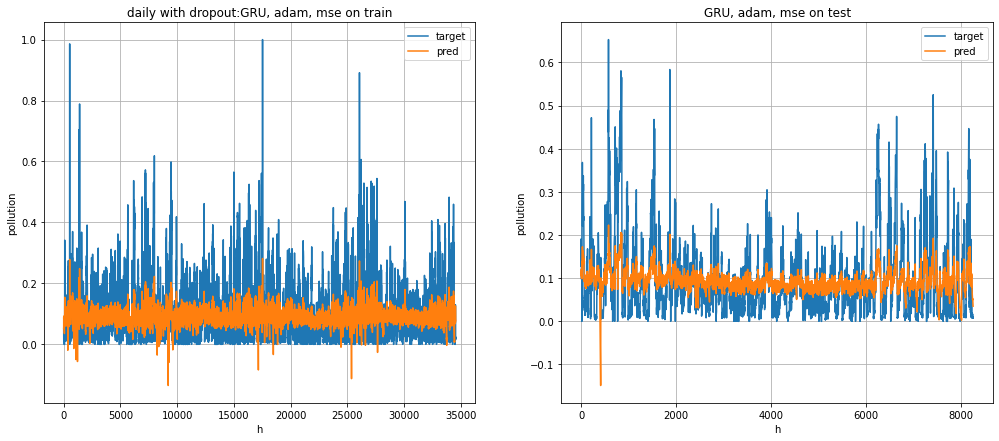

In [0]:
plot_performance('GRU', 'adam', 'mse', drop_model, hour_train_f, hour_train_t, hour_test_f, hour_test_t, desc='daily with dropout:')

# Feature Selection
1. Corelation(Pearsons' coefs)
2. Forward Selection
3. Covariance matrix

## 1. Peassons' coefs
f_names = ['pollution', 'dew', 'temp', 'pressure', 'wind_dir', 'wind_spd', 'snow', 'rain']


In [0]:
R = np.corrcoef(X_train.reshape(8, -1))

In [0]:
R.shape

(8, 8)

In [0]:
for row in R:
    print(row)

[1.         0.54517825 0.81542745 0.56259057 0.8192431  0.5552506
 0.81058834 0.53940527]
[0.54517825 1.         0.53149645 0.83484307 0.54523349 0.82765899
 0.56347396 0.83000557]
[0.81542745 0.53149645 1.         0.54992311 0.80924559 0.53607321
 0.80687106 0.53011609]
[0.56259057 0.83484307 0.54992311 1.         0.56200266 0.84196172
 0.57694528 0.8430106 ]
[0.8192431  0.54523349 0.80924559 0.56200266 1.         0.54550374
 0.80774743 0.53630626]
[0.5552506  0.82765899 0.53607321 0.84196172 0.54550374 1.
 0.55428548 0.83009938]
[0.81058834 0.56347396 0.80687106 0.57694528 0.80774743 0.55428548
 1.         0.55076467]
[0.53940527 0.83000557 0.53011609 0.8430106  0.53630626 0.83009938
 0.55076467 1.        ]


# make dim reduced data

In [0]:
hour_gen_train = TimeseriesGenerator(X_train[:,[0,2,4]], X_train[:,0], length = 23, sampling_rate=1 , start_index=3*7*24 - 23,batch_size=1)

In [0]:
len(hour_gen_train)

34536

In [0]:
hour_gen_test = TimeseriesGenerator(X_test[:,[0,2,4]], X_test[:,0], length = 23, sampling_rate=1 , start_index=3*7*24 - 23,batch_size=1)

In [0]:
len(hour_gen_test)

8255

In [0]:
hour_train_f, hour_train_t = TimeSeriesGen2np(hour_gen_train, 23, 3)
hour_test_f, hour_test_t = TimeSeriesGen2np(hour_gen_test, 23, 3)

In [0]:
hour_train_f.shape

(34536, 23, 3)

# GRU model

In [0]:
hour_model = make_model(GRU, 'adam', 'mse', 23, 3)

In [0]:
hour_history = hour_model.fit(hour_train_f, hour_train_t, validation_data=(hour_test_f, hour_test_t), epochs=50, batch_size=256)

Train on 34536 samples, validate on 8255 samples
Epoch 1/50
34536/34536 [==============================] - 14s 409us/step - loss: 0.2367 - val_loss: 0.1641
Epoch 2/50
34536/34536 [==============================] - 12s 347us/step - loss: 0.1042 - val_loss: 0.0703
Epoch 3/50
34536/34536 [==============================] - 11s 330us/step - loss: 0.0461 - val_loss: 0.0329
Epoch 4/50
34536/34536 [==============================] - 11s 323us/step - loss: 0.0245 - val_loss: 0.0199
Epoch 5/50
34536/34536 [==============================] - 12s 335us/step - loss: 0.0175 - val_loss: 0.0157
Epoch 6/50
34536/34536 [==============================] - 11s 329us/step - loss: 0.0152 - val_loss: 0.0141
Epoch 7/50
34536/34536 [==============================] - 12s 349us/step - loss: 0.0141 - val_loss: 0.0131
Epoch 8/50
34536/34536 [==============================] - 11s 319us/step - loss: 0.0132 - val_loss: 0.0122
Epoch 9/50
34536/34536 [==============================] - 11s 332us/step - loss: 0.0123 - val_l

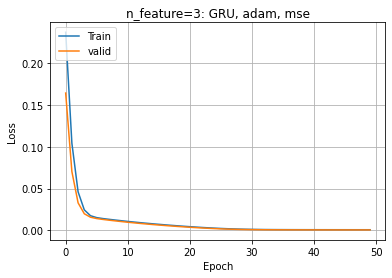

In [0]:
plot_loss('GRU', 'adam', 'mse', hour_history, 'n_feature=3: ')

mse on train: 0.0007809150652502156
mse on test: 0.0005653024947260598


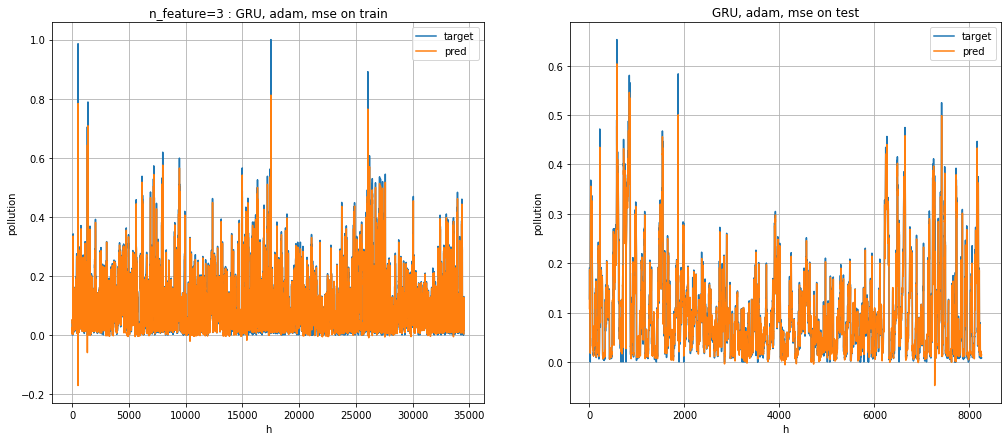

In [0]:
plot_performance('GRU', 'adam', 'mse', hour_model, hour_train_f, hour_train_t, hour_test_f, hour_test_t, desc='n_feature=3 : ')

# LSTM model

In [0]:
hour_model = make_model(LSTM, 'adam', 'mse', 23, 3)

In [0]:
hour_history = hour_model.fit(hour_train_f, hour_train_t, validation_data=(hour_test_f, hour_test_t), epochs=50, batch_size=256)

Train on 34536 samples, validate on 8255 samples
Epoch 1/50
34536/34536 [==============================] - 9s 274us/step - loss: 0.0219 - val_loss: 0.0141
Epoch 2/50
34536/34536 [==============================] - 9s 267us/step - loss: 0.0124 - val_loss: 0.0109
Epoch 3/50
34536/34536 [==============================] - 9s 269us/step - loss: 0.0101 - val_loss: 0.0091
Epoch 4/50
34536/34536 [==============================] - 9s 259us/step - loss: 0.0086 - val_loss: 0.0077
Epoch 5/50
34536/34536 [==============================] - 9s 259us/step - loss: 0.0074 - val_loss: 0.0065
Epoch 6/50
34536/34536 [==============================] - 9s 258us/step - loss: 0.0063 - val_loss: 0.0055
Epoch 7/50
34536/34536 [==============================] - 9s 268us/step - loss: 0.0053 - val_loss: 0.0046
Epoch 8/50
34536/34536 [==============================] - 9s 263us/step - loss: 0.0045 - val_loss: 0.0037
Epoch 9/50
34536/34536 [==============================] - 9s 266us/step - loss: 0.0038 - val_loss: 0.00

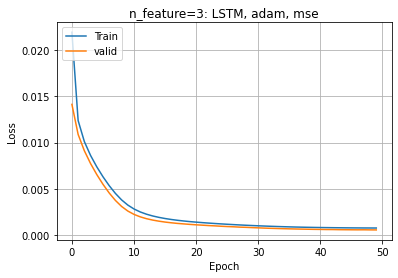

In [0]:
plot_loss('LSTM', 'adam', 'mse', hour_history, 'n_feature=3: ')

mse on train: 0.0007626322758868802
mse on test: 0.0005595340647890956


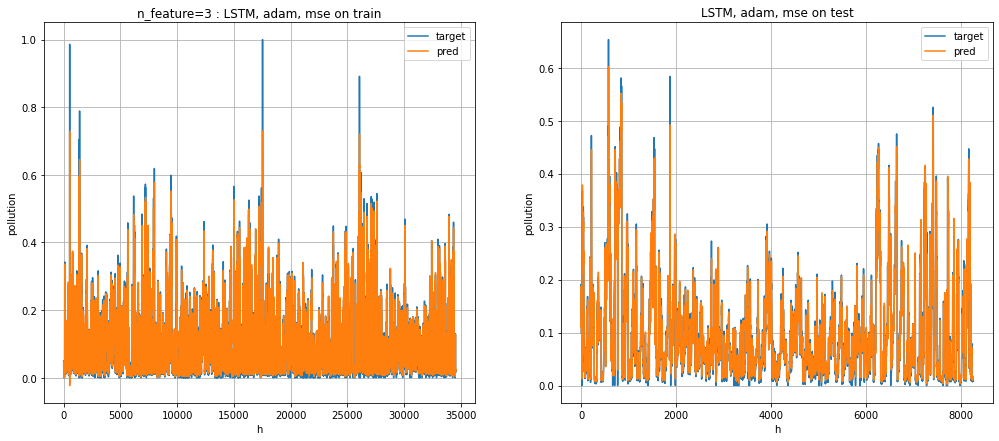

In [0]:
plot_performance('LSTM', 'adam', 'mse', hour_model, hour_train_f, hour_train_t, hour_test_f, hour_test_t, desc='n_feature=3 : ')

# simple RNN model

In [0]:
hour_model = make_model(SimpleRNN, 'adam', 'mse', 23, 3)

In [0]:
hour_history = hour_model.fit(hour_train_f, hour_train_t, validation_data=(hour_test_f, hour_test_t), epochs=50, batch_size=256)

Train on 34536 samples, validate on 8255 samples
Epoch 1/50
34536/34536 [==============================] - 4s 102us/step - loss: 0.8245 - val_loss: 0.5958
Epoch 2/50
34536/34536 [==============================] - 3s 98us/step - loss: 0.2197 - val_loss: 0.0588
Epoch 3/50
34536/34536 [==============================] - 3s 97us/step - loss: 0.0560 - val_loss: 0.0404
Epoch 4/50
34536/34536 [==============================] - 3s 93us/step - loss: 0.0404 - val_loss: 0.0293
Epoch 5/50
34536/34536 [==============================] - 3s 96us/step - loss: 0.0297 - val_loss: 0.0217
Epoch 6/50
34536/34536 [==============================] - 3s 97us/step - loss: 0.0222 - val_loss: 0.0162
Epoch 7/50
34536/34536 [==============================] - 4s 103us/step - loss: 0.0167 - val_loss: 0.0122
Epoch 8/50
34536/34536 [==============================] - 3s 94us/step - loss: 0.0127 - val_loss: 0.0092
Epoch 9/50
34536/34536 [==============================] - 3s 93us/step - loss: 0.0097 - val_loss: 0.0070
Epoc

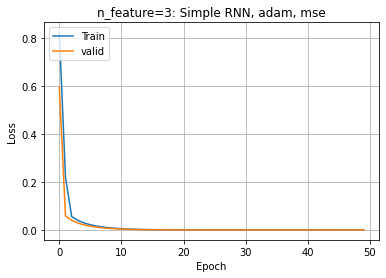

In [0]:
plot_loss('Simple RNN', 'adam', 'mse', hour_history, 'n_feature=3: ')

mse on train: 0.0008925867489374482
mse on test: 0.000674810415322242


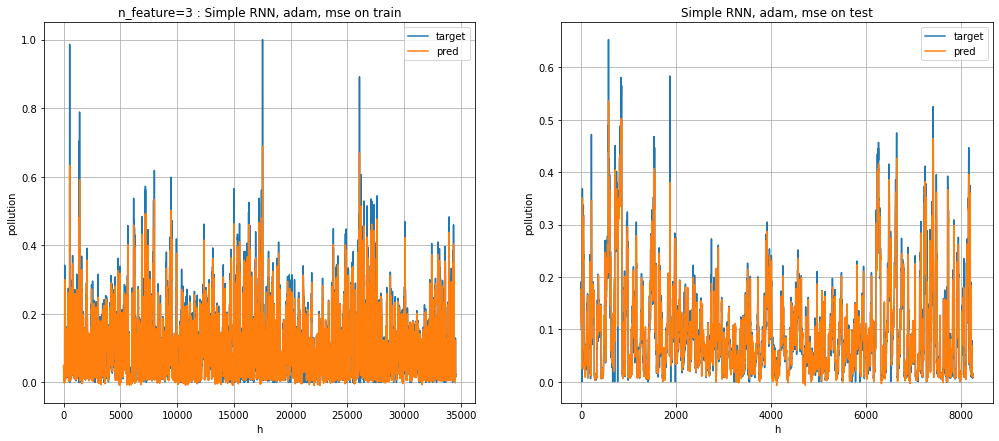

In [0]:
plot_performance('Simple RNN', 'adam', 'mse', hour_model, hour_train_f, hour_train_t, hour_test_f, hour_test_t, desc='n_feature=3 : ')